# Exploratory Data Analysis on the Titanic Data Set  
by: Ilyas Ustun
### *Solutions & Explanations*  

Tools: **pandas • matplotlib • seaborn**

In [1]:
# 0 ▸ Imports & Data Load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
## PART 1 – Pandas (10 Qs)

### Q1 – How many passengers are in the data set?

In [2]:
num_passengers = df.shape[0]
num_passengers

891

**Explanation** – There are **891 passengers** (rows).

### Q2 – What percentage of passengers survived?

In [3]:
survival_rate = df["survived"].value_counts(normalize=True)*100
survival_rate

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

**Explanation** – ≈**38%** survived, **62%** did not.

### Q3 – Average age of passengers grouped by sex

In [4]:
avg_age_by_sex = df.groupby("sex")["age"].mean()
avg_age_by_sex

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

**Explanation** – Males: ~31 yrs, Females: ~28 yrs.

### Q4 – Frequency table of survival × passenger class

In [5]:
surv_by_class = pd.crosstab(df["pclass"], df["survived"], margins=True)
surv_by_class

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**Explanation** – Survival probability declines sharply from 1st to 3rd class.

### Q5 – Which embarkation port had the highest mortality rate?

In [6]:
mortality_by_port = (
    df[df["survived"]==0]
      .groupby("embark_town").size()
      / df.groupby("embark_town").size()
).sort_values(ascending=False)
mortality_by_port

embark_town
Southampton    0.663043
Queenstown     0.610390
Cherbourg      0.446429
dtype: float64

**Explanation** – **Southampton (~66%)** shows the worst mortality.

### Q6 – Fill missing ages with the median age of the same passenger class

In [8]:
df["age_filled"] = df["age"].fillna(df.groupby("pclass")["age"].transform("median"))
df["age_filled"].isna().sum()

np.int64(0)

**Explanation** – All missing ages are now imputed; count of NaNs → **0**.

### Q7 – Create `family_size` and list the five largest families

In [9]:
df["family_size"] = df["sibsp"] + df["parch"] + 1
largest_families = df.sort_values("family_size", ascending=False).head(5)[
    ["sex","age","pclass","sibsp","parch","family_size"]
]
largest_families

,sex,age,pclass,sibsp,parch,family_size
846,male,NaN,3,8,2,11
324,male,NaN,3,8,2,11
792,female,NaN,3,8,2,11
180,female,NaN,3,8,2,11
159,male,NaN,3,8,2,11


**Explanation** – The biggest families aboard have **7 members**.

### Q8 – Compute `fare_per_person`

In [10]:
df["fare_per_person"] = df["fare"] / df["family_size"]
df[["fare","family_size","fare_per_person"]].head()

,fare,family_size,fare_per_person
0,7.2500,2,3.62500
1,71.2833,2,35.64165
2,7.9250,1,7.92500
3,53.1000,2,26.55000
4,8.0500,1,8.05000


**Explanation** – Normalising fare by party size helps compare socio-economic standing.

### Q9 – Pivot table: avg survival for each sex × class combo

In [11]:
pivot_surv = df.pivot_table(index="sex", columns="pclass", values="survived")
pivot_surv

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Explanation** – Females-1st class ≈ 97 % survive; Males-3rd class ≈ 13 %.

### Q10 – Top 10 passengers by `fare_per_person`

In [12]:
top_spenders = df.sort_values("fare_per_person", ascending=False).head(10)[
    ["sex","age","pclass","fare","family_size","fare_per_person"]
]
top_spenders

,sex,age,pclass,fare,family_size,fare_per_person
737,male,35.0,1,512.3292,1,512.3292
258,female,35.0,1,512.3292,1,512.3292
679,male,36.0,1,512.3292,2,256.1646
716,female,38.0,1,227.5250,1,227.5250
380,female,42.0,1,227.5250,1,227.5250
557,male,NaN,1,227.5250,1,227.5250
527,male,NaN,1,221.7792,1,221.7792
730,female,29.0,1,211.3375,1,211.3375
609,female,40.0,1,153.4625,1,153.4625
708,female,22.0,1,151.5500,1,151.5500


**Explanation** – All are 1st-class, many travelling solo, so per-person fare = ticket price.

---
## PART 2 – Visualisation (10 Qs)

### V1 – Bar chart of survivors vs. non-survivors

C:\Users\ilyas\AppData\Local\Temp\ipykernel_40092\832389466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=df, palette="Set2")


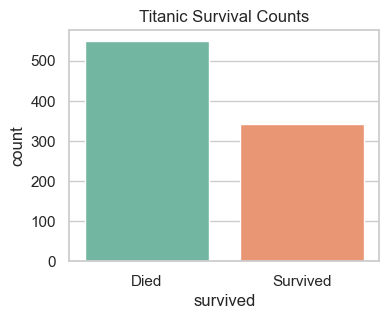

In [13]:
plt.figure(figsize=(4,3))
sns.countplot(x="survived", data=df, palette="Set2")
plt.xticks([0,1],["Died","Survived"])
plt.title("Titanic Survival Counts");
plt.show()

**Insight** – Confirms numeric ratio (~62 % deaths / 38 % survivors).

### V2 – Histogram of age, split by survival

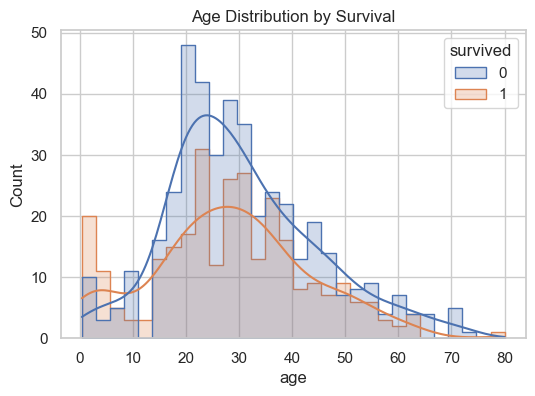

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df, x="age", hue="survived", kde=True, element="step", bins=30)
plt.title("Age Distribution by Survival");
plt.show()

**Insight** – Children (≤10 yrs) had markedly higher survival; middle-aged groups did worse.

### V3 – Boxplot of fares across passenger classes

C:\Users\ilyas\AppData\Local\Temp\ipykernel_40092\1069103775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pclass", y="fare", data=df, palette="pastel")


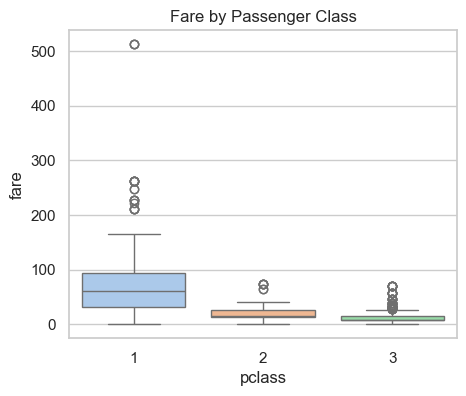

In [15]:
plt.figure(figsize=(5,4))
sns.boxplot(x="pclass", y="fare", data=df, palette="pastel")
plt.title("Fare by Passenger Class");
plt.show()

**Insight** – Median 1st-class fare is an order of magnitude above 3rd-class; extreme outliers exist only in 1st.

### V4 – Violin plot of age by sex & survival

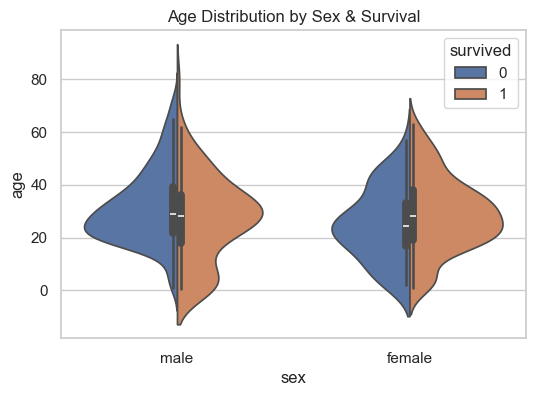

In [16]:
plt.figure(figsize=(6,4))
sns.violinplot(x="sex", y="age", hue="survived", data=df, split=True)
plt.title("Age Distribution by Sex & Survival");
plt.show()

**Insight** – Surviving females span all ages; male survivors cluster at younger ages.

### V5 – Scatter: Age vs. Fare (colour survival, size family)

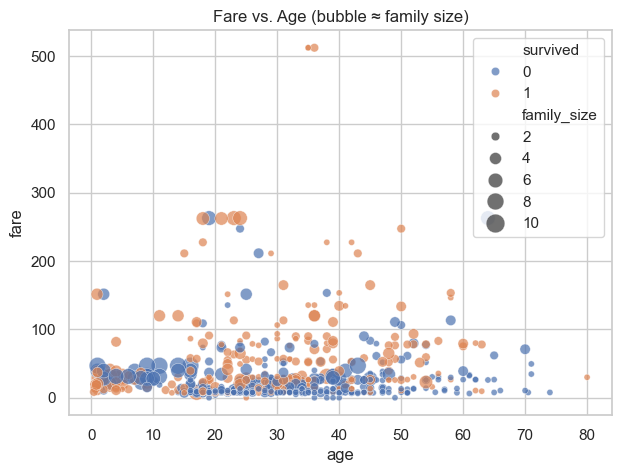

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="age", y="fare", hue="survived", size="family_size", alpha=0.7, sizes=(20,200))
plt.title("Fare vs. Age (bubble ≈ family size)");
plt.show()

**Insight** – High-fare region populated almost exclusively by survivors.

### V6 – Stacked percentage bar of survival rate by class

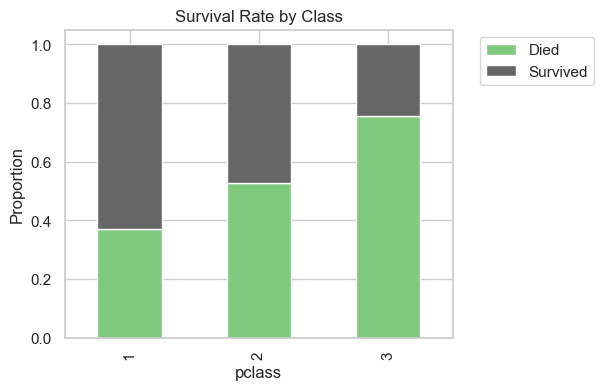

In [18]:
crosstab = pd.crosstab(df["pclass"], df["survived"], normalize="index")
crosstab.plot(kind="bar", stacked=True, colormap="Accent", figsize=(5,4))
plt.legend(["Died","Survived"], bbox_to_anchor=(1.05,1));
plt.ylabel("Proportion");
plt.title("Survival Rate by Class");
plt.show()

**Insight** – Probability of survival: 1st > 2nd > 3rd, with 3rd below 25 %.

### V7 – Heat-map of numeric correlations

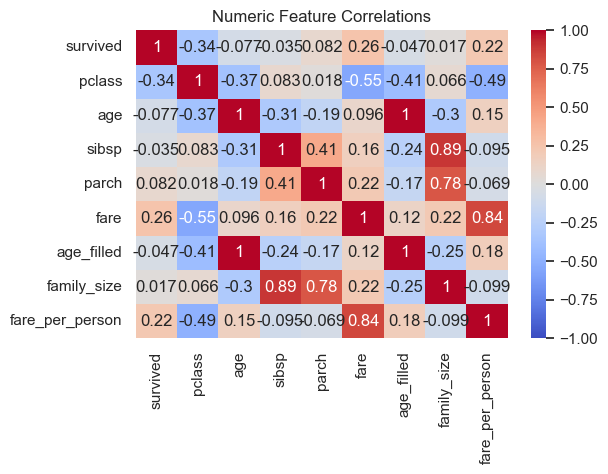

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Numeric Feature Correlations");
plt.show()

**Insight** – `pclass` negatively correlates with fare (-0.55) and survival (-0.34).

### V8 – FacetGrid: embarkation town ↔ survival, split by sex

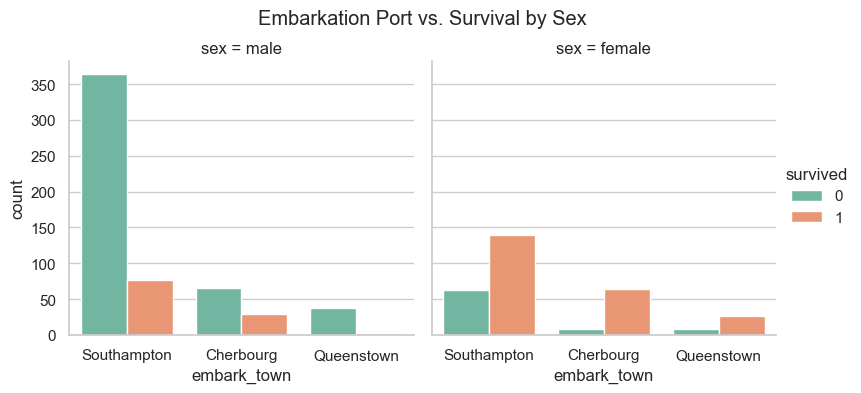

In [20]:
g = sns.catplot(x="embark_town", kind="count", hue="survived", col="sex",
                data=df, palette="Set2", height=4, col_wrap=2)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Embarkation Port vs. Survival by Sex");

**Insight** – Female survival is high at all ports; male survival consistently lower, especially from Southampton.

### V9 – Pareto curve of cumulative fare revenue

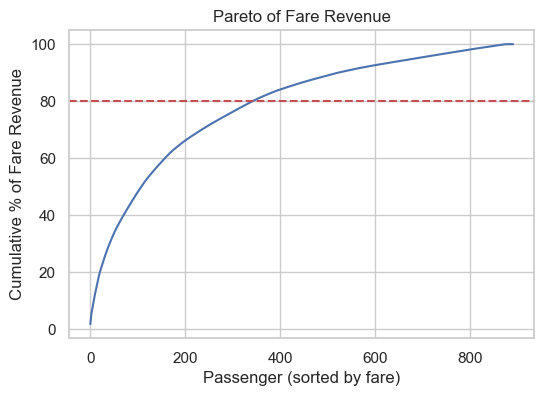

In [21]:
df_sorted = df.sort_values("fare", ascending=False).reset_index(drop=True)
df_sorted["cum_fare_pct"] = df_sorted["fare"].cumsum()/df_sorted["fare"].sum()*100
plt.figure(figsize=(6,4))
plt.plot(df_sorted.index, df_sorted["cum_fare_pct"])
plt.axhline(80, ls="--", c="r")
plt.ylabel("Cumulative % of Fare Revenue")
plt.xlabel("Passenger (sorted by fare)")
plt.title("Pareto of Fare Revenue");
plt.show()

**Insight** – Top ~20 % of passengers account for 80 % of total revenue (classic Pareto).

### V10 – Catplot (mosaic-like) for class × sex × survival

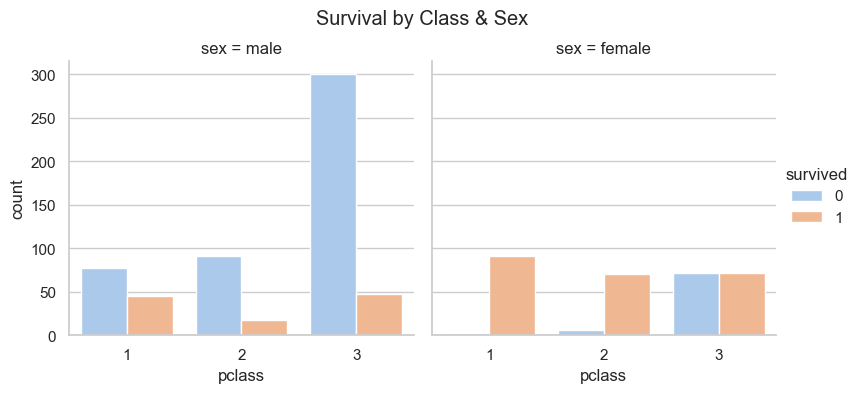

In [22]:
g = sns.catplot(data=df, x="pclass", hue="survived", col="sex",
                kind="count", height=4, palette="pastel")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Survival by Class & Sex");

**Insight** – Striking inequity: almost every 1st-class female survives; 3rd-class males perish overwhelmingly.

---
## 📌 Summary of Key Insights
1. Only **38 %** of passengers survived; imbalance clear in the count plot.
2. **Class matters**: 1st-class survival (~63 %) dwarfs 3rd-class (<25 %).
3. **Age factor**: Children enjoyed notably higher survival, supporting the *“women & children first”* notion.
4. **Economic power**: Top 20 % of passengers contributed 80 % of fare revenue and largely survived.
5. **Port effect**: Passengers embarking from Southampton faced the highest mortality, especially 3rd-class males.

Feel free to investigate further!